In [ ]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import the dataset using the pandas library

In [ ]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset.shape

(1156, 7)

To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Data Preprocessing**
As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword

In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.



In [ ]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [ ]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])

#drop rows with null values.
dataset.dropna(inplace=True)

#drop the duplicates rows from the dataset.
dataset.drop_duplicates(inplace=True)


**Data Visualization**

checking the unique values in dataset of the columns with object datatype.

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

In [ ]:
print(dataset['CATEGORY'].dtype)
dataset['CATEGORY'] = dataset['CATEGORY'].astype(str)
print(dataset['CATEGORY'].unique())
print(dataset['CATEGORY'].isnull().sum())


object
['Business' 'Personal']
0


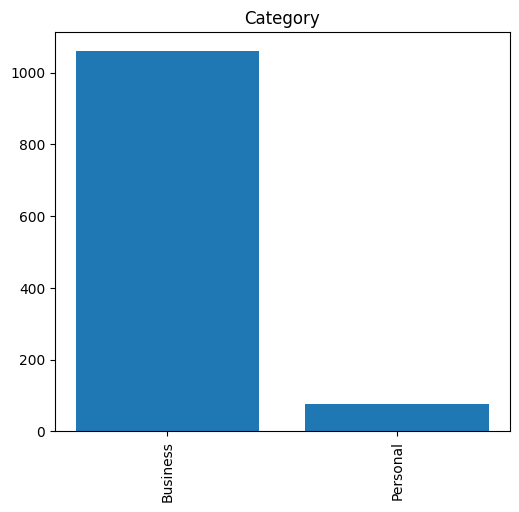

In [ ]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(dataset['CATEGORY'].value_counts().index, dataset['CATEGORY'].value_counts())
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Category')
plt.show()


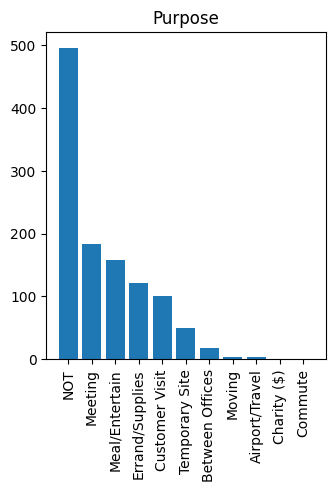

In [ ]:

plt.subplot(1,2,2)
purpose_counts = dataset['PURPOSE'].value_counts()
plt.bar(purpose_counts.index, purpose_counts)
plt.xticks(rotation=90)

plt.tight_layout()
plt.title('Purpose')
plt.show()


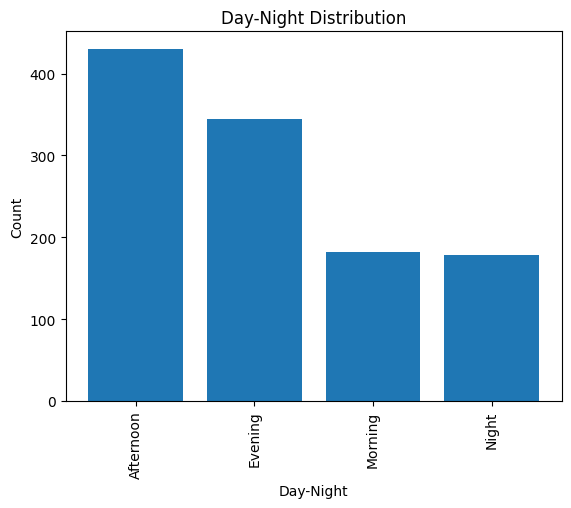

In [ ]:
day_night_counts = dataset['day-night'].value_counts()

plt.bar(day_night_counts.index, day_night_counts)
plt.xlabel('Day-Night')
plt.ylabel('Count')
plt.title('Day-Night Distribution')
plt.xticks(rotation=90)
plt.show()

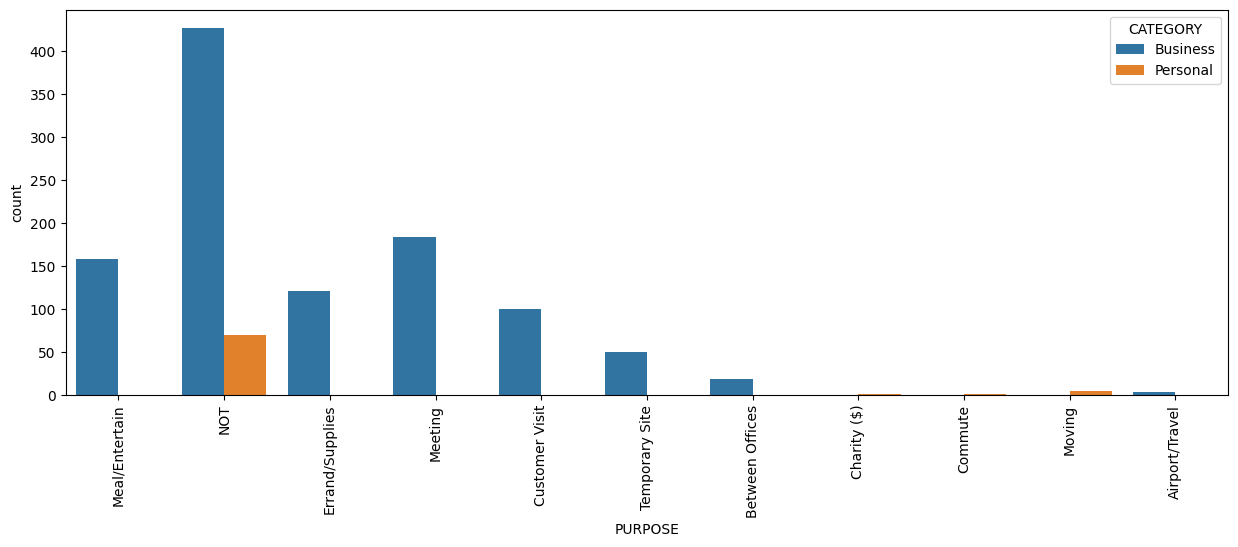

In [ ]:
#comparing the two different categories along with the PURPOSE of the user.
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


Insights from the above count-plots :
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).
As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [ ]:

from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<ipython-input-46-fcb3f1038c60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

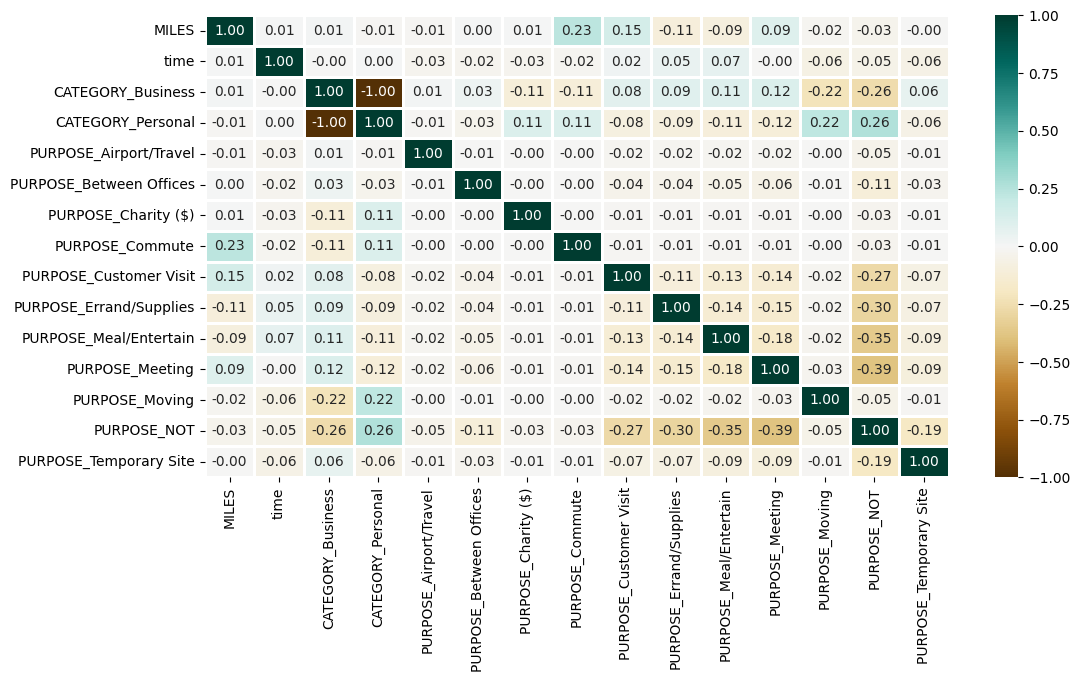

In [ ]:
#finding the correlation between the columns using heatmap.


plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

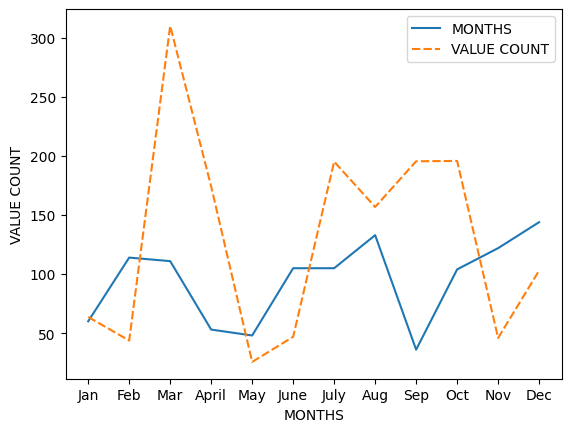

In [ ]:
#visualize the month data
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Text(0, 0.5, 'COUNT')

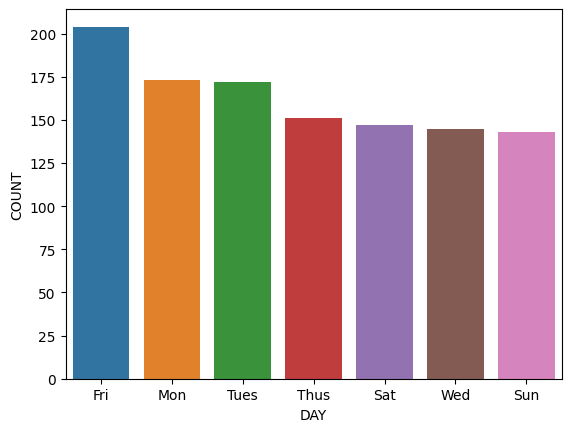

In [ ]:
#Visualization for days data.
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

